<a href="https://colab.research.google.com/github/QingyingYan/BDAO_data/blob/main/Final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing for Online Retail Dataset

This notebook outlines the data preprocessing steps applied to the Online Retail Dataset. The objective is to prepare the dataset for exploratory data analysis (EDA) and clustering. Each step is crucial for ensuring that the data is clean, relevant, and formatted correctly for further analysis or modeling.

---
### 1. Importing Libraries and Loading the Dataset

First, we import the necessary libraries and load the dataset into a pandas DataFrame.

In [94]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotel_bookings.csv', encoding='ISO-8859-1')

We can visualise the dataset using different [Pandas functions, such as head() (first five rows of the dataset) and tail() (last five rows of the dataset).](https://www.geeksforgeeks.org/pandas-functions-in-python/)

In [95]:
print("First five rows of the dataset:")
print(df.head())

print("Last five rows of the dataset:")
print(df.tail())

print("Size of the dataset:")
print(df.shape)

First five rows of the dataset:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0     

---
### 2. Handling Missing or Null Values

Missing data can significantly impact the quality of the analysis. Therefore, we need to check for missing values and handle them appropriately. Handling missing values is crucial in data preprocessing, especially in fields like data analysis, machine learning, and statistics. The two primary methods for dealing with missing values are removing or replacing them. Choosing between these methods depends on the context and nature of your data.

In [96]:
# First, check and print the number of missing values (if there are any) in the dataset
print("Number of missing values:")
print(df.isnull().sum())

Number of missing values:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

---
### 4. Handling Outliers

Outliers can distort statistical analyses. We identify and filter out outliers based on the [Interquartile Range (IQR)](https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/) for Quantity and UnitPrice.

In [97]:
# Handling Outliers
# Identify outliers in 'Quantity' and 'UnitPrice'
Q1 = df[['adr']].quantile(0.25)
Q3 = df[['adr']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on IQR
df = df[~((df[['adr']] < (Q1 - 1.5 * IQR)) | (df[['adr']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df.shape)

print(df.head())

(115597, 32)
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Depo

In [98]:
def booking_source(row):
    if pd.notna(row['agent']):
        return 1  # 代表有代理
    elif pd.notna(row['company']):
        return 2  # 代表有公司
    else:
        return 3  # 代表直接预订

# 确保新列是整数类型
df['booking_source'] = df.apply(booking_source, axis=1).astype(int)

In [99]:
df.drop(columns=['agent', 'company'], inplace=True)
df.head()
print(df.shape)

(115597, 31)


---
### 5. Data Normalization

Normalizing data to have a mean of 0 and a standard deviation of 1 helps to compare features that have different units or scales.

In [100]:
# Data Normalization
# Initialize the StandardScaler
'''scaler = StandardScaler()

# Instead of directly setting the scaled values, use .loc to ensure we're modifying the DataFrame directly
df.loc[:, ['adr']] = scaler.fit_transform(df[['adr']])

# Print cleaned data information and head to verify
print(df.info())
print(df.head())'''

"scaler = StandardScaler()\n\n# Instead of directly setting the scaled values, use .loc to ensure we're modifying the DataFrame directly\ndf.loc[:, ['adr']] = scaler.fit_transform(df[['adr']])\n\n# Print cleaned data information and head to verify\nprint(df.info())\nprint(df.head())"

---
### 6. Feature Selection Matrix Analysis

Selecting the right features is crucial for effective modeling. We conclude our preprocessing by analysing the correlation among features.

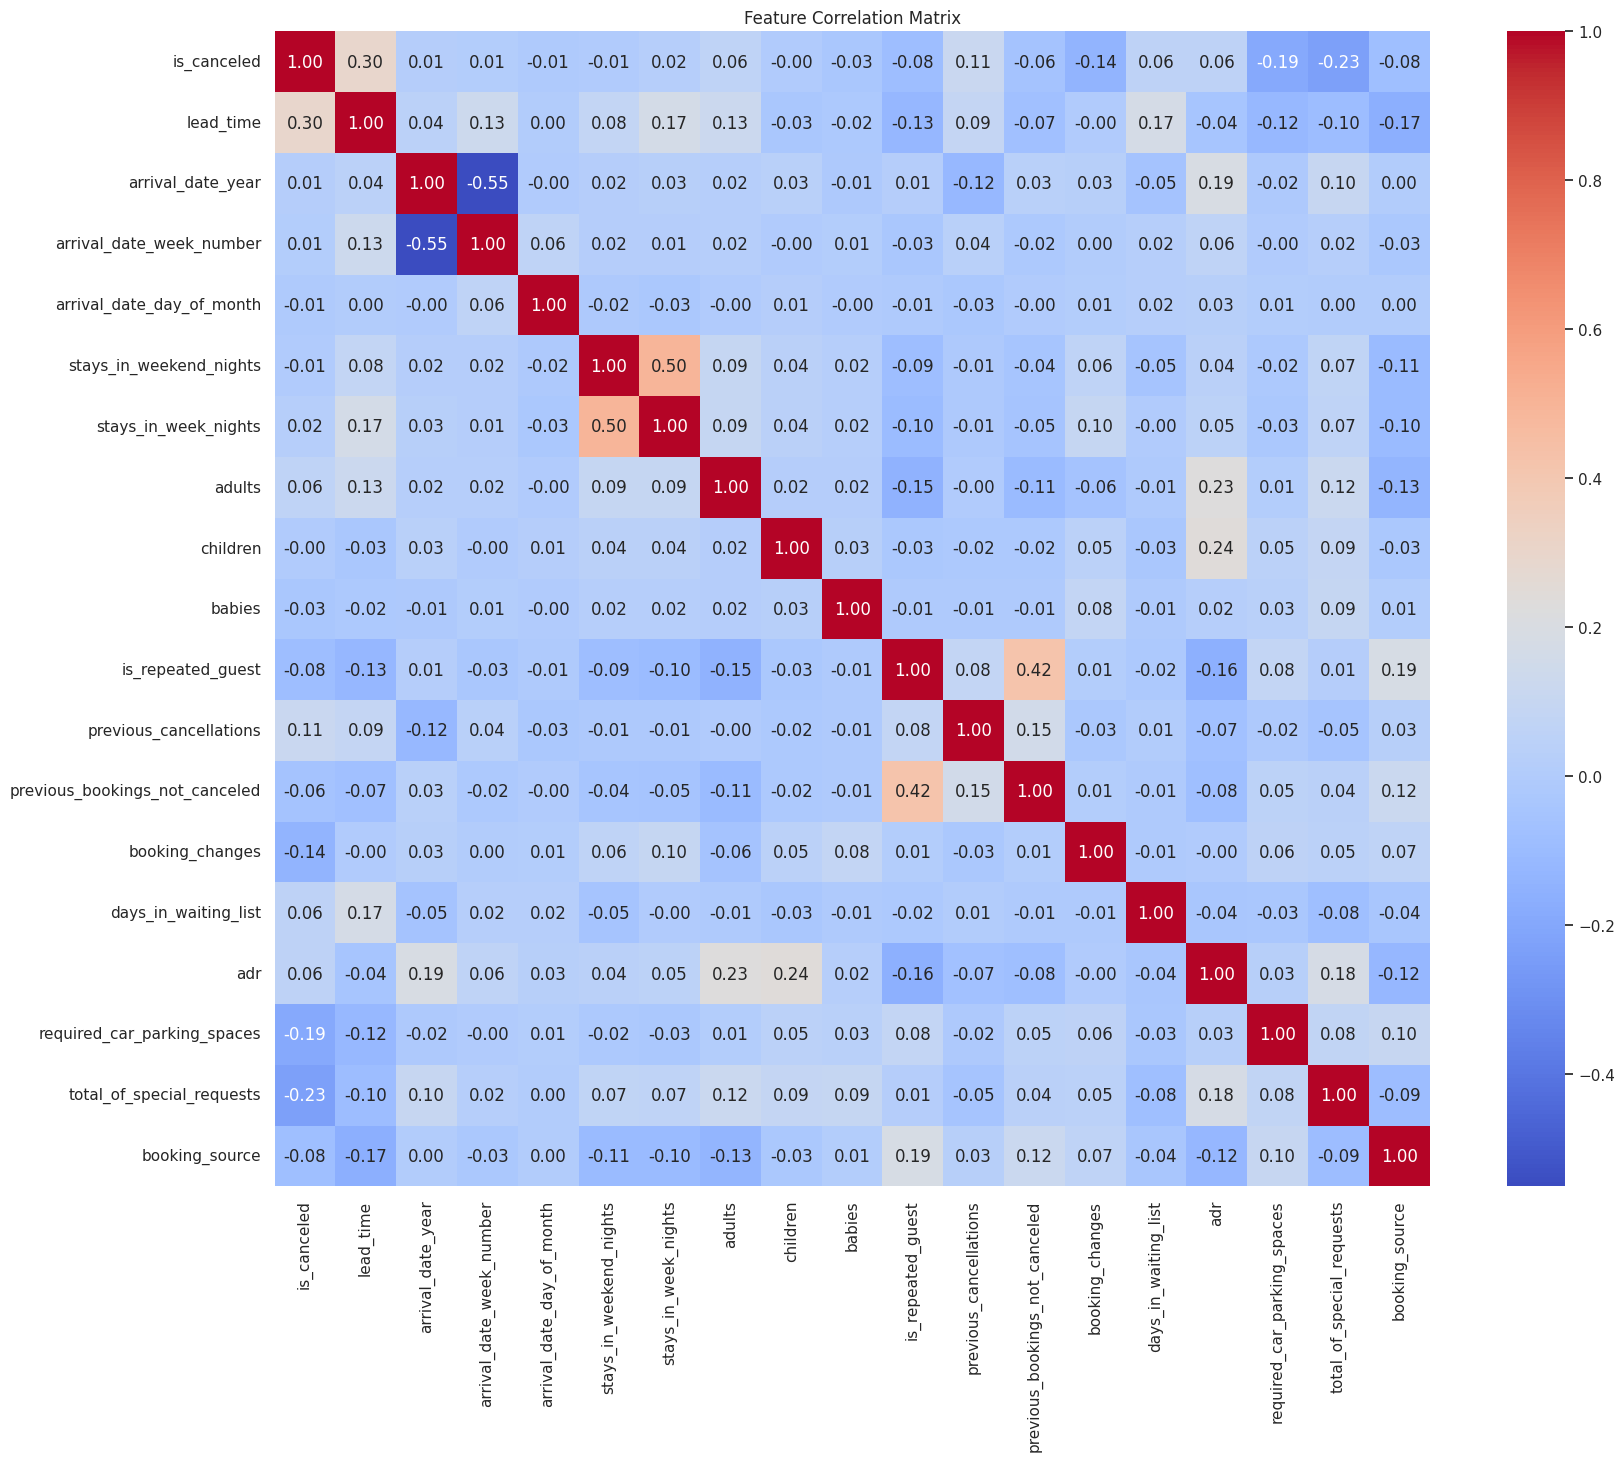

In [101]:
# 在添加新列之后重新计算相关性矩阵
correlation_matrix = df.corr(numeric_only=True)

# 调整图形尺寸
plt.figure(figsize=(20, 15))  # 将尺寸调整得更大
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()


Save the Preprocessed dataset.

In [102]:
df.to_csv("hotel_bookingsClean.csv", index = None, header=True)

---

# EDA Analysis

Different plots to assist in getting data insights.


Descriptive Statistics for Numeric Features:
         is_canceled      lead_time  arrival_date_year  \
count  115597.000000  115597.000000      115597.000000   
mean        0.369863     105.019594        2016.144753   
std         0.482769     107.698911           0.706990   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      70.000000        2016.000000   
75%         1.000000     162.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             115597.000000              115597.000000   
mean                  27.045788                  15.770089   
std                   13.751521                   8.783471   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000  

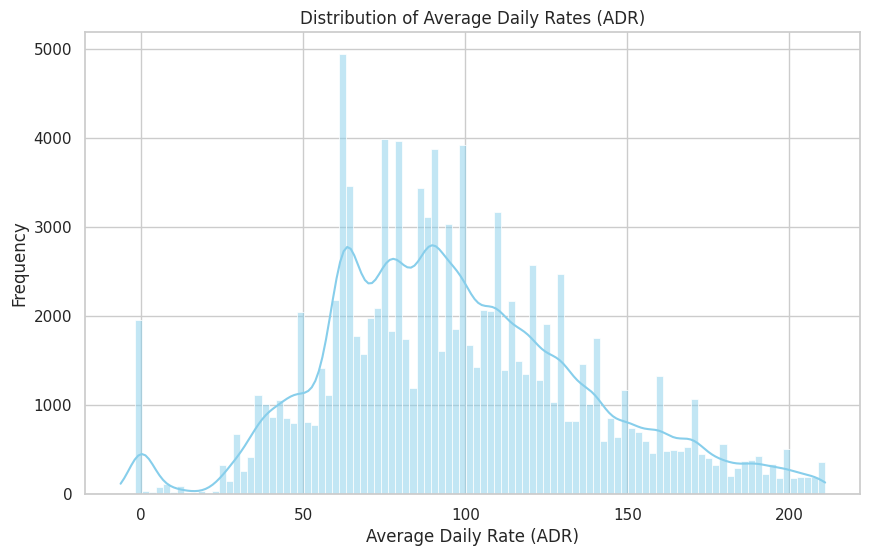

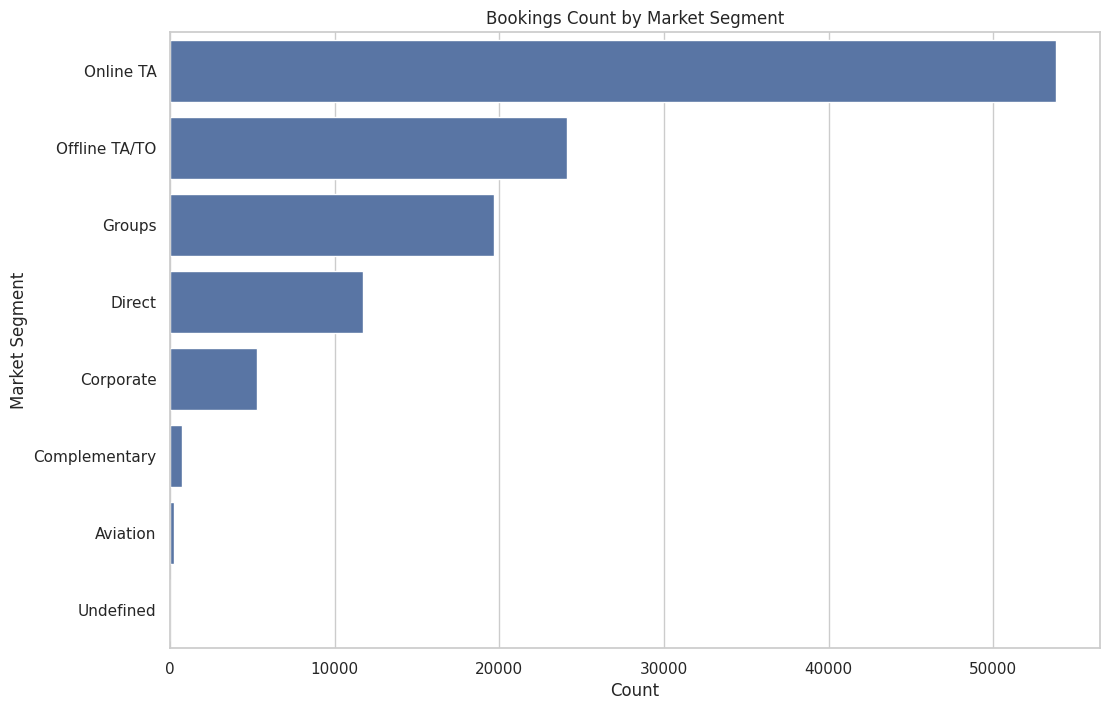

<ipython-input-103-e4f2ad21b8dd>:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_for_eda['arrival_date_month'] = pd.to_datetime(df_for_eda['arrival_date_year'].astype(str) + '-' + df_for_eda['arrival_date_month'])


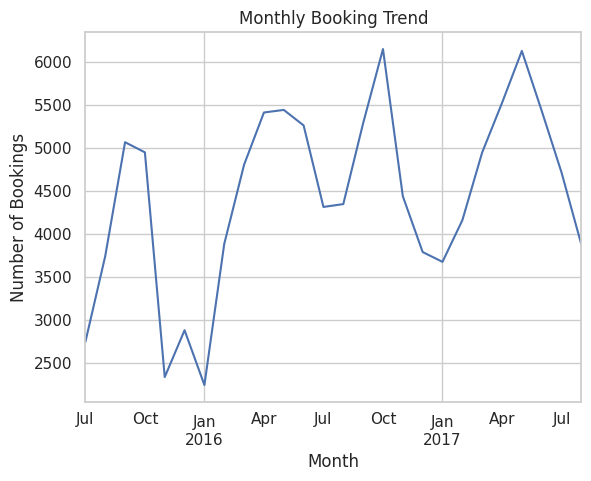

<ipython-input-103-e4f2ad21b8dd>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_room_types.values, y=top_room_types.index, palette='viridis')


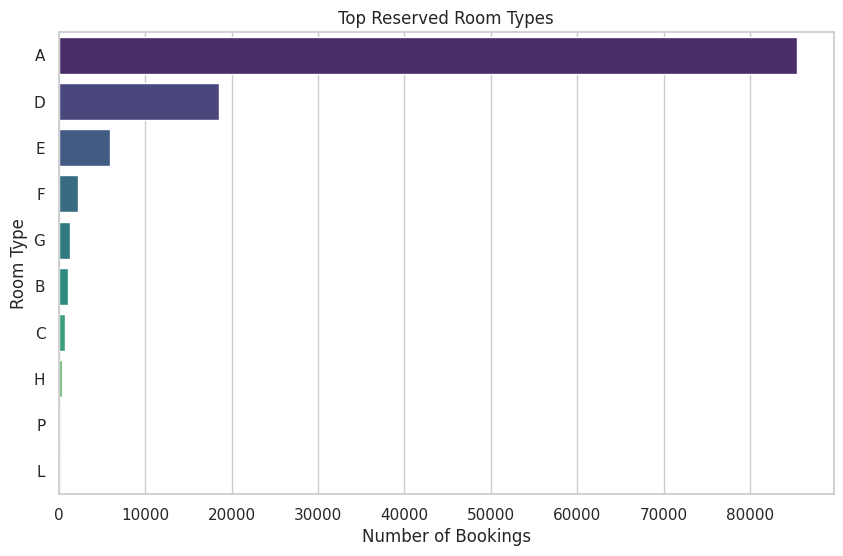

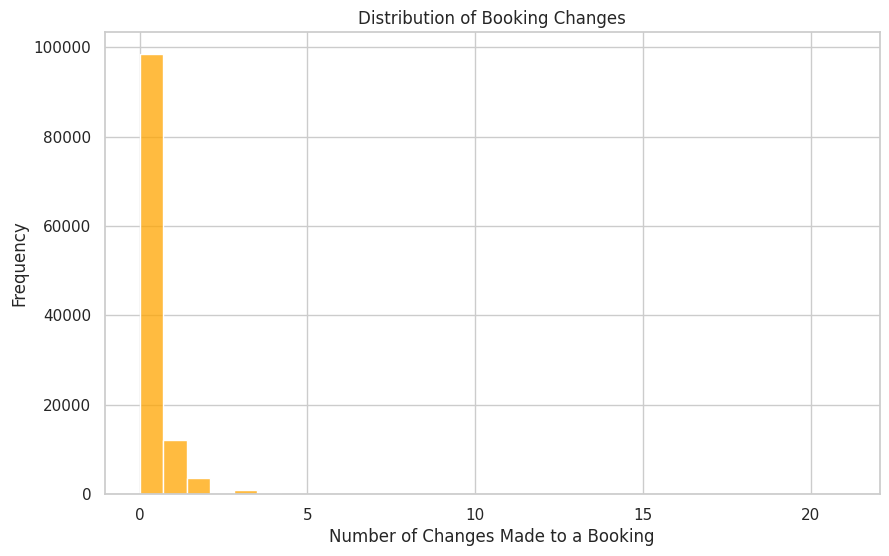

<ipython-input-103-e4f2ad21b8dd>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='country', x='counts', data=country_counts.head(20), palette='coolwarm')


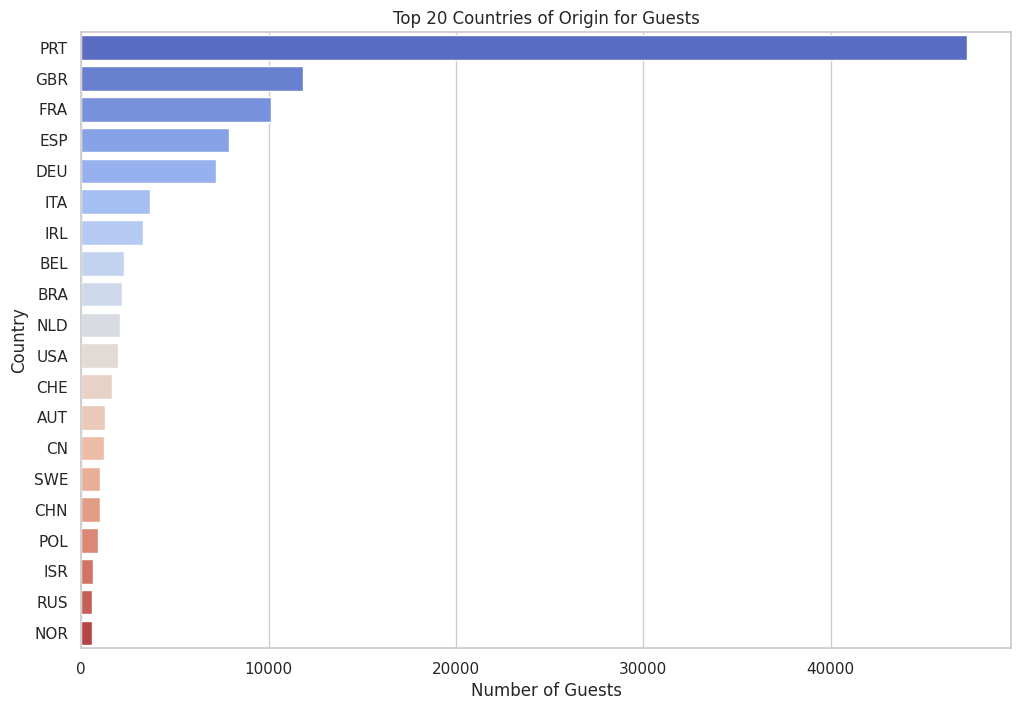

<ipython-input-103-e4f2ad21b8dd>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='total_of_special_requests', data=df_for_eda, palette='spring')


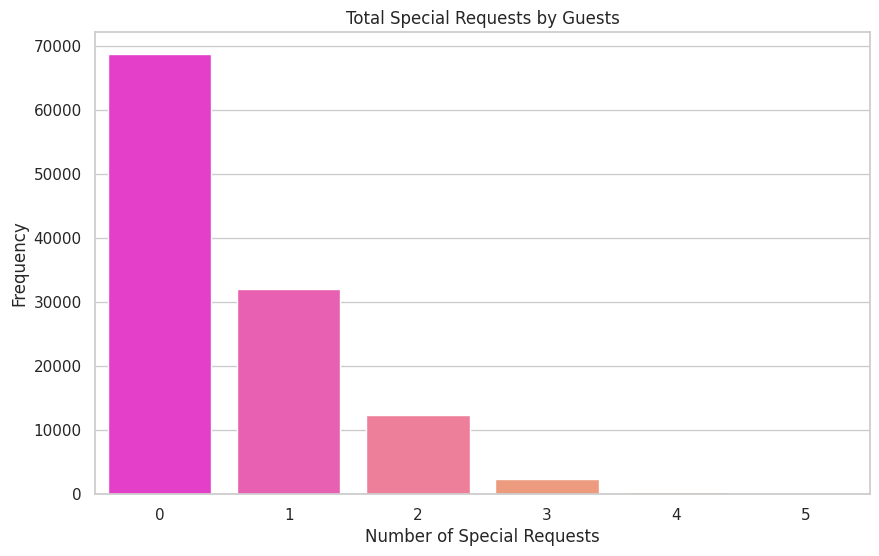

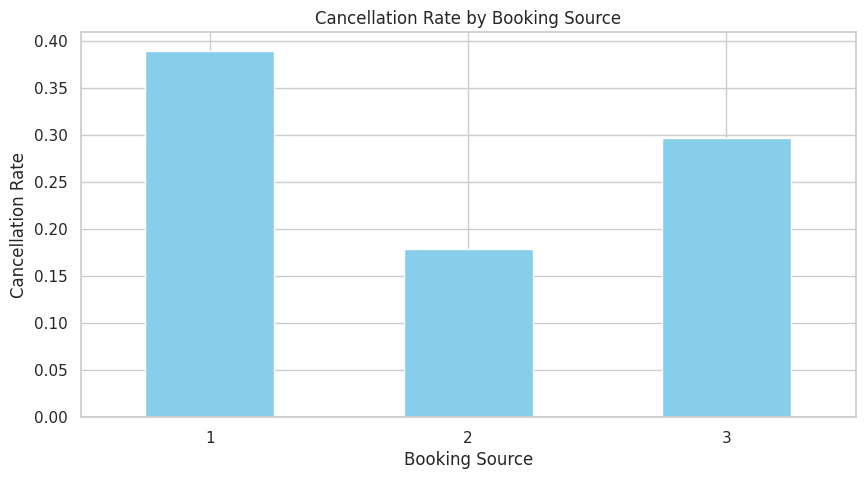

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据集
df = pd.read_csv("hotel_bookingsClean.csv")  # 请确保路径正确

# 复制DataFrame进行EDA分析
df_for_eda = df.copy()

# 基本信息
print("Descriptive Statistics for Numeric Features:")
print(df_for_eda.describe(include=[np.number]))  # 只对数值型特征进行描述性统计

print("\nDescriptive Statistics for Categorical Features:")
print(df_for_eda.describe(include=[object]))  # 对类别型特征进行描述性统计

# 可视化设置
sns.set(style="whitegrid")

### 数值数据的分布：ADR (Average Daily Rate)

plt.figure(figsize=(10, 6))
sns.histplot(df_for_eda['adr'], kde=True, color='skyblue')
plt.title('Distribution of Average Daily Rates (ADR)')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Frequency')
plt.show()

### 分类数据的分布：Market Segment

plt.figure(figsize=(12, 8))
sns.countplot(y='market_segment', data=df_for_eda, order=df_for_eda['market_segment'].value_counts().index)
plt.title('Bookings Count by Market Segment')
plt.xlabel('Count')
plt.ylabel('Market Segment')
plt.show()

### 时间趋势分析：预订数量随时间的变化

# 转换日期列为 datetime 类型，并提取年份和月份信息
df_for_eda['arrival_date_month'] = pd.to_datetime(df_for_eda['arrival_date_year'].astype(str) + '-' + df_for_eda['arrival_date_month'])
df_for_eda.set_index('arrival_date_month', inplace=True)

# 按月份汇总预订数量
df_for_eda.resample('M').size().plot()
plt.title('Monthly Booking Trend')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

### 最受欢迎的房型分析

top_room_types = df_for_eda['reserved_room_type'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_room_types.values, y=top_room_types.index, palette='viridis')
plt.title('Top Reserved Room Types')
plt.xlabel('Number of Bookings')
plt.ylabel('Room Type')
plt.show()

### 预订改变次数的分布

plt.figure(figsize=(10, 6))
sns.histplot(df_for_eda['booking_changes'], bins=30, kde=False, color='orange')
plt.title('Distribution of Booking Changes')
plt.xlabel('Number of Changes Made to a Booking')
plt.ylabel('Frequency')
plt.show()

### 客户国家的分布
# 假设数据已加载到df_for_eda中，并且已完成必要的预处理
### 客户国家的分布：确保没有重复的国家索引
# 计算每个国家的客户数，并确保索引唯一
country_counts = df_for_eda['country'].value_counts().reset_index()
country_counts.columns = ['country', 'counts']

# 确保没有重复的国家名作为索引
country_counts = country_counts.drop_duplicates(subset=['country'])

# 画图
plt.figure(figsize=(12, 8))
sns.barplot(y='country', x='counts', data=country_counts.head(20), palette='coolwarm')
plt.title('Top 20 Countries of Origin for Guests')
plt.xlabel('Number of Guests')
plt.ylabel('Country')
plt.show()


### 特殊请求的数量分布

plt.figure(figsize=(10, 6))
sns.countplot(x='total_of_special_requests', data=df_for_eda, palette='spring')
plt.title('Total Special Requests by Guests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Frequency')
plt.show()


# 分析预订来源与取消率的关系
source_cancellation_rates = df.groupby('booking_source')['is_canceled'].mean()

plt.figure(figsize=(10, 5))
source_cancellation_rates.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Booking Source')
plt.xlabel('Booking Source')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=0)
plt.show()


# Your turn!

Repeat the analysis for a supermarket dataset!

1. Load the dataset

In [ ]:
# First, we need to load the dataset into Google Colab.
# This statement allows you to select the file from your laptop and upload it to Google Cloud.
# Please wait until you see 100% done and the play button is resumed. it might take a while to upload because the dataset is large

# Import necessary Python libraries
from google.colab import files

#Upload the dataset to Google Colab
uploaded = files.upload()

Saving supermarket_data_cleaned.csv to supermarket_data_cleaned.csv


2. Perform the data preprocessing.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df2 = pd.read_csv('supermarket_data_cleaned.csv')

print("First five rows of the dataset:")
print(df2.head())

print("Last five rows of the dataset:")
print(df2.tail())

print("Size of the dataset:")
print(df2.shape)

# First, check and print the number of missing values (if there are any) in the dataset
print("Number of missing values:")
print(df2.isnull().sum())

# Drop rows where customer ID is empty/missing as it's essential for our analysis
df2.dropna(inplace=True)

# 2. Removing duplicates
# Drop duplicate rows to ensure data quality
df2.drop_duplicates(inplace=True)

print("Size of the dataset after removing missing values:")
print(df2.shape)

# Feature Selection
# Compute the correlation matrix to identify relationships between variables
correlation_matrix = df2.corr(numeric_only=True)

# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

## EDA

3. Obtain descriptive statistics and Plot the graphs

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset to understand its structure
print(df2.head())

# Generate summary statistics for numerical attributes
print(df2.describe())

# Generate counts for categorical attributes if there are any
# In this case, we will assume 'Customer_ID' is categorical (even though it's numerical in nature)
print(df2['Customer_ID'].value_counts())

# Visualizations

# Histograms for numerical attributes
numerical_attributes = ['Age', 'Num_children', 'Family_size', 'Income', 'Recency',
                        'Total_spent', 'Total_num_purchase', 'Register_days', 'MntWines',
                        'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                        'MntSweetProducts', 'MntGoldProds']
for column in numerical_attributes:
    plt.figure(figsize=(10, 6))
    sns.histplot(df2[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Box plots for numerical attributes to check for outliers
for column in numerical_attributes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df2[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Pairwise relationships
# Selecting a few attributes to avoid a very large pairplot
selected_attributes = ['Age', 'Income', 'Total_spent', 'Total_num_purchase', 'NumWebVisitsMonth']
sns.pairplot(df2[selected_attributes])
plt.show()

# Correlation heatmap
correlation_matrix = df2[numerical_attributes].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Bar plots for categorical data or discrete numerical data
# Example: Number of purchases by Family Size
plt.figure(figsize=(10, 6))
sns.barplot(x='Family_size', y='Total_num_purchase', data=df2, estimator=sum)
plt.title('Total Number of Purchases by Family Size')
plt.show()

# Scatter plot to explore the relationship between two variables of interest
# Example: Income vs Total Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_spent', data=df2)
plt.title('Income vs Total Spent')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.show()

# Additional analyses can include more specific visualizations, advanced statistical tests,
# or segmentation using clustering algorithms if needed.